
- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [466]:
# (this is not an exhaustive list of libraries)
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags

In [467]:
import importlib
import functions_variables
importlib.reload(functions_variables)
from functions_variables import flatten_dict, load_and_flatten_json
from functions_variables import find_duplicate_rows
from functions_variables import find_columns_with_all_nulls
from functions_variables import drop_columns_with_many_nulls
from functions_variables import drop_specified_columns
from functions_variables import convert_to_datetime, normalize_timezone, extract_date_component
from functions_variables import get_columns_to_drop


In [468]:
path = '/Users/asalzooashkiany/Documents/-DS-Midterm-Project./data'

# List all files in the given directory
files = os.listdir(path)

results=[]

# Loop through each file
for filename in files:
    # Check if the file is a JSON file
    if filename.endswith('.json'):
        # Construct full file path
        file_path = os.path.join(path, filename)
        # Open and load the JSON file
        with open(file_path, 'r') as json_data:
            d = json.load(json_data)
            # Assuming you're interested in the 'data' -> 'results' part of each JSON
            results.append(d.get('data', {}).get('results', []))

        
             # Print a newline for better separation between files

In [469]:
len(results)

250

In [470]:
results[0]

[{'primary_photo': {'href': 'https://ap.rdcpix.com/8c0b391ae4f9bbca36c41d559ef75598l-m2349710986s-w1024_h768.jpg'},
  'last_update_date': '2024-01-17T00:01:55Z',
  'source': {'plan_id': None,
   'agents': [{'office_name': None}, {'office_name': None}],
   'spec_id': None,
   'type': 'mls'},
  'tags': ['central_air',
   'dishwasher',
   'fireplace',
   'forced_air',
   'hardwood_floors',
   'washer_dryer',
   'basement',
   'single_story',
   'garage_1_or_more',
   'garage_2_or_more',
   'big_yard',
   'vaulted_ceiling',
   'open_floor_plan',
   'floor_plan',
   'corner_lot',
   'big_lot',
   'ensuite'],
  'permalink': '1869-Pebble-Ct_Harrisburg_PA_17110_M33009-59879',
  'status': 'sold',
  'list_date': '2023-11-27T05:15:07.000000Z',
  'open_houses': None,
  'description': {'year_built': 2001,
   'baths_3qtr': None,
   'sold_date': '2024-01-16',
   'sold_price': 345000,
   'baths_full': 2,
   'name': None,
   'baths_half': None,
   'lot_sqft': 22651,
   'sqft': 1539,
   'baths': 2,
   '

### Making lists for the information thta i;m intrested in

In [471]:
tags_list = []
last_update_date_list = []
status_list = []
list_date_list = []
description_list = []  # This might need special handling if it's nested
list_price_list = []
flags_list = []        # This might need special handling if it's nested
price_reduced_amount_list = []
location_list = []     # This might need special handling if it's nested

### extracting and filling the above list from our dataset

In [472]:

for item in results:
    for j in item: 
        last_update_date_list.append(j.get('last_update_date'))
        status_list.append(j.get('status'))
        list_date_list.append(j.get('list_date'))

        tags_list.append(j.get('tags', []))
    
    # Append the whole 'description' dictionary, if it exists
        description_list.append(j.get('description'))
    
        list_price_list.append(j.get('list_price'))
    
    # Append the whole 'flags' dictionary, if it exists
        flags_list.append(j.get('flags'))

        price_reduced_amount_list.append(j.get('price_reduced_amount'))
    
    # Append the whole 'location' dictionary, if it exists
        location_list.append(j.get('location'))

    

In [473]:
import pandas as pd

df = pd.DataFrame({
    'Tags': tags_list,
    'last_update_date': last_update_date_list,
    'status': status_list,
    'list_date': list_date_list,
    'description_yearbuilt': description_list,  
    'list_Price': list_price_list,
    'is_New_Listing': flags_list,           
    'price_reduced_amount': price_reduced_amount_list,
    'location': location_list              
})

df.head()


,Tags,last_update_date,status,list_date,description_yearbuilt,list_Price,is_New_Listing,price_reduced_amount,location
0,"[central_air, dishwasher, fireplace, forced_ai...",2024-01-17T00:01:55Z,sold,2023-11-27T05:15:07.000000Z,"{'year_built': 2001, 'baths_3qtr': None, 'sold...",334900.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17110', 'state': ..."
1,"[disability_features, basement, garage_1_or_mo...",2024-01-16T16:49:36Z,sold,2023-11-23T11:38:45.000000Z,"{'year_built': 1900, 'baths_3qtr': None, 'sold...",185000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17110', 'state': ..."
2,"[carport, central_air, dishwasher, fireplace, ...",2024-01-13T00:03:39Z,sold,2023-12-16T02:39:18.000000Z,"{'year_built': 1971, 'baths_3qtr': None, 'sold...",197000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17111', 'state': ..."
3,"[central_air, dining_room, disability_features...",2024-01-16T07:48:30Z,sold,2023-10-24T14:15:02.000000Z,"{'year_built': 2013, 'baths_3qtr': None, 'sold...",295000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17112', 'state': ..."
4,"[dining_room, hardwood_floors, basement]",2024-01-13T00:01:45Z,sold,2023-11-15T17:43:35.000000Z,"{'year_built': 1900, 'baths_3qtr': None, 'sold...",105000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17104', 'state': ..."


In [474]:
df['Tags'][0]

['central_air',
 'dishwasher',
 'fireplace',
 'forced_air',
 'hardwood_floors',
 'washer_dryer',
 'basement',
 'single_story',
 'garage_1_or_more',
 'garage_2_or_more',
 'big_yard',
 'vaulted_ceiling',
 'open_floor_plan',
 'floor_plan',
 'corner_lot',
 'big_lot',
 'ensuite']

In [475]:
len(df)

8159

In [476]:
cities = []
states = []

for location in location_list:
    
    address = location.get('address', {}) 
    city = address.get('city', '')  
    state = address.get('state', '')  # Extract state, default to empty string if not found
    
    cities.append(city)
    states.append(state)

df['City'] = cities
df['State'] = states




In [477]:
df.head()

,Tags,last_update_date,status,list_date,description_yearbuilt,list_Price,is_New_Listing,price_reduced_amount,location,City,State
0,"[central_air, dishwasher, fireplace, forced_ai...",2024-01-17T00:01:55Z,sold,2023-11-27T05:15:07.000000Z,"{'year_built': 2001, 'baths_3qtr': None, 'sold...",334900.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17110', 'state': ...",Harrisburg,Pennsylvania
1,"[disability_features, basement, garage_1_or_mo...",2024-01-16T16:49:36Z,sold,2023-11-23T11:38:45.000000Z,"{'year_built': 1900, 'baths_3qtr': None, 'sold...",185000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17110', 'state': ...",Harrisburg,Pennsylvania
2,"[carport, central_air, dishwasher, fireplace, ...",2024-01-13T00:03:39Z,sold,2023-12-16T02:39:18.000000Z,"{'year_built': 1971, 'baths_3qtr': None, 'sold...",197000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17111', 'state': ...",Harrisburg,Pennsylvania
3,"[central_air, dining_room, disability_features...",2024-01-16T07:48:30Z,sold,2023-10-24T14:15:02.000000Z,"{'year_built': 2013, 'baths_3qtr': None, 'sold...",295000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17112', 'state': ...",Harrisburg,Pennsylvania
4,"[dining_room, hardwood_floors, basement]",2024-01-13T00:01:45Z,sold,2023-11-15T17:43:35.000000Z,"{'year_built': 1900, 'baths_3qtr': None, 'sold...",105000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,"{'address': {'postal_code': '17104', 'state': ...",Harrisburg,Pennsylvania


### droping the location column since we extracted city and state from it 

In [478]:
df = df.drop(columns='location')

### changing my columns with dates and time to only have dates 

In [479]:
def convert_date(x):
    try:
        # This will work for datetime objects
        return x.date()
    except AttributeError:
        # If x is a string or anything else without a .date() method
        return x

# Attempt to convert everything to datetime first; this will not change strings that are already in 'YYYY-MM-DD' format
df['last_update_date'] = pd.to_datetime(df['last_update_date'], errors='coerce').fillna(df['last_update_date'])
df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce').fillna(df['list_date'])

# Now safely apply the conversion or pass through the value if conversion isn't applicable
df['last_update_date'] = df['last_update_date'].apply(convert_date)
df['list_date'] = df['list_date'].apply(convert_date)


In [480]:
df

,Tags,last_update_date,status,list_date,description_yearbuilt,list_Price,is_New_Listing,price_reduced_amount,City,State
0,"[central_air, dishwasher, fireplace, forced_ai...",2024-01-17,sold,2023-11-27,"{'year_built': 2001, 'baths_3qtr': None, 'sold...",334900.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,Harrisburg,Pennsylvania
1,"[disability_features, basement, garage_1_or_mo...",2024-01-16,sold,2023-11-23,"{'year_built': 1900, 'baths_3qtr': None, 'sold...",185000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,Harrisburg,Pennsylvania
2,"[carport, central_air, dishwasher, fireplace, ...",2024-01-13,sold,2023-12-16,"{'year_built': 1971, 'baths_3qtr': None, 'sold...",197000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,Harrisburg,Pennsylvania
3,"[central_air, dining_room, disability_features...",2024-01-16,sold,2023-10-24,"{'year_built': 2013, 'baths_3qtr': None, 'sold...",295000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,Harrisburg,Pennsylvania
4,"[dining_room, hardwood_floors, basement]",2024-01-13,sold,2023-11-15,"{'year_built': 1900, 'baths_3qtr': None, 'sold...",105000.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,Harrisburg,Pennsylvania
...,...,...,...,...,...,...,...,...,...,...
8154,None,NaT,sold,NaT,"{'year_built': None, 'baths_3qtr': None, 'sold...",NaN,"{'is_new_construction': None, 'is_for_rent': N...",NaN,Indianapolis,Indiana
8155,"[hardwood_floors, single_story, garage_1_or_mo...",2023-08-22,sold,2023-07-25,"{'year_built': 1960, 'baths_3qtr': None, 'sold...",144900.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,Indianapolis,Indiana
8156,"[central_air, city_view, dining_room, family_r...",2023-08-18,sold,2023-08-10,"{'year_built': 1985, 'baths_3qtr': None, 'sold...",195900.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,Indianapolis,Indiana
8157,"[city_view, community_spa_or_hot_tub, communit...",2023-08-17,sold,2023-08-14,"{'year_built': 1989, 'baths_3qtr': None, 'sold...",169900.0,"{'is_new_construction': None, 'is_for_rent': N...",NaN,Indianapolis,Indiana


In [481]:
df['description_yearbuilt'][0]

{'year_built': 2001,
 'baths_3qtr': None,
 'sold_date': '2024-01-16',
 'sold_price': 345000,
 'baths_full': 2,
 'name': None,
 'baths_half': None,
 'lot_sqft': 22651,
 'sqft': 1539,
 'baths': 2,
 'sub_type': None,
 'baths_1qtr': None,
 'garage': 2,
 'stories': 1,
 'beds': 3,
 'type': 'single_family'}

In [482]:
print(len(tags_list))

8159


### using description_list instead of description_yearbuilt' so i could access the data that i need since description_list is a df and wont let me extract the data that i want 

In [483]:
# Initialize lists to store the information
year_built = []
sold_date = []
sold_price = []
baths_full_list = []  
lot_sqft = []
baths = []
beds = []
garage = []
type_ = []  

for description in description_list:
    
    year = description.get('year_built', '')
    sold = description.get('sold_date', '')
    price_sold = description.get('sold_price', '')
    baths_full_val = description.get('baths_full', '') 

    # Append the extracted values to their respective lists
    year_built.append(year)
    sold_date.append(sold)
    sold_price.append(price_sold)
    baths_full_list.append(baths_full_val)
    lot_sqft.append(description.get('lot_sqft', ''))
    baths.append(description.get('baths', ''))
    beds.append(description.get('beds', ''))
    garage.append(description.get('garage', ''))
    type_.append(description.get('type', ''))


### integrate the lists for year_built, sold_date, sold_price, baths_full_list, lot_sqft, baths, beds, garage, and type_ into the DataFrame 

In [484]:
# Assuming your DataFrame 'df' exists and these lists are filled with your data
df['Year Built'] = year_built
df['Sold Date'] = sold_date
df['Sold Price'] = sold_price
df['Baths Full'] = baths_full_list  # Ensure this is the correct list name
df['Lot SqFt'] = lot_sqft
df['Baths'] = baths
df['Beds'] = beds
df['Garage'] = garage
df['Type'] = type_  # Ensure 'type_' list is used to avoid conflict with the Python keyword 'type'


## droping description_yearbuilt since i got the info that i want and also realizing is_New_Listing is not giving me any info so droping it

In [485]:
df= df.drop(columns='description_yearbuilt')

In [486]:
df= df.drop(columns='is_New_Listing')

In [487]:
df.head()

,Tags,last_update_date,status,list_date,list_Price,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type
0,"[central_air, dishwasher, fireplace, forced_ai...",2024-01-17,sold,2023-11-27,334900.0,NaN,Harrisburg,Pennsylvania,2001.0,2024-01-16,345000.0,2.0,22651.0,2.0,3.0,2.0,single_family
1,"[disability_features, basement, garage_1_or_mo...",2024-01-16,sold,2023-11-23,185000.0,NaN,Harrisburg,Pennsylvania,1900.0,2024-01-16,196000.0,NaN,2614.0,NaN,3.0,3.0,multi_family
2,"[carport, central_air, dishwasher, fireplace, ...",2024-01-13,sold,2023-12-16,197000.0,NaN,Harrisburg,Pennsylvania,1971.0,2024-01-12,205000.0,2.0,13504.0,2.0,3.0,NaN,single_family
3,"[central_air, dining_room, disability_features...",2024-01-16,sold,2023-10-24,295000.0,NaN,Harrisburg,Pennsylvania,2013.0,2024-01-12,295000.0,2.0,2688.0,3.0,3.0,1.0,townhomes
4,"[dining_room, hardwood_floors, basement]",2024-01-13,sold,2023-11-15,105000.0,NaN,Harrisburg,Pennsylvania,1900.0,2024-01-12,106000.0,NaN,871.0,NaN,3.0,NaN,multi_family


In [488]:
df.count()

Tags                    7638
last_update_date        8125
status                  8159
list_date               7752
list_Price              7721
price_reduced_amount    2484
City                    8154
State                   8159
Year Built              7316
Sold Date               8159
Sold Price              6716
Baths Full              7311
Lot SqFt                6991
Baths                   7980
Beds                    7504
Garage                  4448
Type                    8125
dtype: int64

### Looking for duplications

In [489]:
df.describe()

,list_Price,price_reduced_amount,Year Built,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage
count,7.721000e+03,2.484000e+03,7316.000000,6.716000e+03,7311.000000,6.991000e+03,7980.000000,7504.000000,4448.000000
mean,4.341582e+05,2.442704e+04,1968.916074,4.126050e+05,1.887430,2.510949e+05,2.131203,3.208289,1.926709
std,5.514925e+05,7.162396e+04,35.096914,6.994308e+05,0.862214,5.823820e+06,1.175940,1.282732,0.878766
min,1.000000e+00,1.000000e+02,1828.000000,3.080000e+02,1.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,2.090000e+05,6.000000e+03,1950.000000,1.910000e+05,1.000000,4.953000e+03,1.000000,3.000000,1.000000
50%,3.250000e+05,1.010000e+04,1975.000000,3.140000e+05,2.000000,7.841000e+03,2.000000,3.000000,2.000000
75%,4.999000e+05,2.000000e+04,1997.000000,4.700000e+05,2.000000,1.263200e+04,3.000000,4.000000,2.000000
max,1.250000e+07,2.015999e+06,2024.000000,2.706500e+07,8.000000,1.676624e+08,9.000000,12.000000,11.000000


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8159 entries, 0 to 8158
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tags                  7638 non-null   object 
 1   last_update_date      8125 non-null   object 
 2   status                8159 non-null   object 
 3   list_date             7752 non-null   object 
 4   list_Price            7721 non-null   float64
 5   price_reduced_amount  2484 non-null   float64
 6   City                  8154 non-null   object 
 7   State                 8159 non-null   object 
 8   Year Built            7316 non-null   float64
 9   Sold Date             8159 non-null   object 
 10  Sold Price            6716 non-null   float64
 11  Baths Full            7311 non-null   float64
 12  Lot SqFt              6991 non-null   float64
 13  Baths                 7980 non-null   float64
 14  Beds                  7504 non-null   float64
 15  Garage               

### dropping the rows in sales that have no sale price.

In [491]:
df = df.dropna(subset=['Sold Price'])


In [492]:
df = df.dropna(subset=['Type'])

In [493]:
df

,Tags,last_update_date,status,list_date,list_Price,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type
0,"[central_air, dishwasher, fireplace, forced_ai...",2024-01-17,sold,2023-11-27,334900.0,NaN,Harrisburg,Pennsylvania,2001.0,2024-01-16,345000.0,2.0,22651.0,2.0,3.0,2.0,single_family
1,"[disability_features, basement, garage_1_or_mo...",2024-01-16,sold,2023-11-23,185000.0,NaN,Harrisburg,Pennsylvania,1900.0,2024-01-16,196000.0,NaN,2614.0,NaN,3.0,3.0,multi_family
2,"[carport, central_air, dishwasher, fireplace, ...",2024-01-13,sold,2023-12-16,197000.0,NaN,Harrisburg,Pennsylvania,1971.0,2024-01-12,205000.0,2.0,13504.0,2.0,3.0,NaN,single_family
3,"[central_air, dining_room, disability_features...",2024-01-16,sold,2023-10-24,295000.0,NaN,Harrisburg,Pennsylvania,2013.0,2024-01-12,295000.0,2.0,2688.0,3.0,3.0,1.0,townhomes
4,"[dining_room, hardwood_floors, basement]",2024-01-13,sold,2023-11-15,105000.0,NaN,Harrisburg,Pennsylvania,1900.0,2024-01-12,106000.0,NaN,871.0,NaN,3.0,NaN,multi_family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,"[central_air, city_view, dining_room, family_r...",2023-08-24,sold,2023-06-28,325000.0,NaN,Indianapolis,Indiana,1952.0,2023-08-24,330000.0,2.0,9583.0,2.0,4.0,1.0,single_family
8155,"[hardwood_floors, single_story, garage_1_or_mo...",2023-08-22,sold,2023-07-25,144900.0,NaN,Indianapolis,Indiana,1960.0,2023-08-22,140000.0,2.0,14810.0,2.0,4.0,2.0,single_family
8156,"[central_air, city_view, dining_room, family_r...",2023-08-18,sold,2023-08-10,195900.0,NaN,Indianapolis,Indiana,1985.0,2023-08-18,210000.0,2.0,871.0,4.0,3.0,1.0,townhomes
8157,"[city_view, community_spa_or_hot_tub, communit...",2023-08-17,sold,2023-08-14,169900.0,NaN,Indianapolis,Indiana,1989.0,2023-08-17,163000.0,2.0,3049.0,2.0,2.0,2.0,condos


### counting the sum of the nulls

In [494]:
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

Tags                     366
last_update_date           0
status                     0
list_date                267
list_Price               267
price_reduced_amount    4686
City                       5
State                      0
Year Built               655
Sold Date                  0
Sold Price                 0
Baths Full               657
Lot SqFt                 902
Baths                    130
Beds                     473
Garage                  3211
Type                       0
dtype: int64


In [495]:
df.describe()

,list_Price,price_reduced_amount,Year Built,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage
count,6.429000e+03,2.010000e+03,6041.000000,6.696000e+03,6039.000000,5.794000e+03,6566.000000,6223.000000,3485.000000
mean,4.048580e+05,2.199040e+04,1966.525906,4.129661e+05,1.879616,1.501545e+05,2.124124,3.212116,1.903300
std,5.400028e+05,7.371923e+04,35.937948,7.004302e+05,0.850489,4.087750e+06,1.158816,1.301410,0.919618
min,1.000000e+00,1.000000e+02,1828.000000,3.080000e+02,1.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,1.947010e+05,5.100000e+03,1946.000000,1.910000e+05,1.000000,4.792000e+03,1.000000,3.000000,1.000000
50%,3.099000e+05,1.000000e+04,1972.000000,3.140000e+05,2.000000,7.841000e+03,2.000000,3.000000,2.000000
75%,4.650000e+05,2.000000e+04,1996.000000,4.705000e+05,2.000000,1.219700e+04,3.000000,4.000000,2.000000
max,1.250000e+07,2.015999e+06,2023.000000,2.706500e+07,7.000000,1.390435e+08,9.000000,12.000000,11.000000


In [496]:
df.count()

Tags                    6330
last_update_date        6696
status                  6696
list_date               6429
list_Price              6429
price_reduced_amount    2010
City                    6691
State                   6696
Year Built              6041
Sold Date               6696
Sold Price              6696
Baths Full              6039
Lot SqFt                5794
Baths                   6566
Beds                    6223
Garage                  3485
Type                    6696
dtype: int64

### since there are so many tags in each row and OHE dosen't look logical to me so i decided to see how many values are in each row and use it for my model

In [497]:
df['Tags'].isnull().sum()

366

In [498]:
 #This will add a new column 'Tags Count' to your DataFrame
# where each row contains the count of tags, or 0 if there were no tags or if the value was NaN.

df['Tags Count'] = df['Tags'].apply(lambda x: len(x) if isinstance(x, list) else 0)
df



,Tags,last_update_date,status,list_date,list_Price,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
0,"[central_air, dishwasher, fireplace, forced_ai...",2024-01-17,sold,2023-11-27,334900.0,NaN,Harrisburg,Pennsylvania,2001.0,2024-01-16,345000.0,2.0,22651.0,2.0,3.0,2.0,single_family,17
1,"[disability_features, basement, garage_1_or_mo...",2024-01-16,sold,2023-11-23,185000.0,NaN,Harrisburg,Pennsylvania,1900.0,2024-01-16,196000.0,NaN,2614.0,NaN,3.0,3.0,multi_family,8
2,"[carport, central_air, dishwasher, fireplace, ...",2024-01-13,sold,2023-12-16,197000.0,NaN,Harrisburg,Pennsylvania,1971.0,2024-01-12,205000.0,2.0,13504.0,2.0,3.0,NaN,single_family,12
3,"[central_air, dining_room, disability_features...",2024-01-16,sold,2023-10-24,295000.0,NaN,Harrisburg,Pennsylvania,2013.0,2024-01-12,295000.0,2.0,2688.0,3.0,3.0,1.0,townhomes,11
4,"[dining_room, hardwood_floors, basement]",2024-01-13,sold,2023-11-15,105000.0,NaN,Harrisburg,Pennsylvania,1900.0,2024-01-12,106000.0,NaN,871.0,NaN,3.0,NaN,multi_family,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,"[central_air, city_view, dining_room, family_r...",2023-08-24,sold,2023-06-28,325000.0,NaN,Indianapolis,Indiana,1952.0,2023-08-24,330000.0,2.0,9583.0,2.0,4.0,1.0,single_family,16
8155,"[hardwood_floors, single_story, garage_1_or_mo...",2023-08-22,sold,2023-07-25,144900.0,NaN,Indianapolis,Indiana,1960.0,2023-08-22,140000.0,2.0,14810.0,2.0,4.0,2.0,single_family,5
8156,"[central_air, city_view, dining_room, family_r...",2023-08-18,sold,2023-08-10,195900.0,NaN,Indianapolis,Indiana,1985.0,2023-08-18,210000.0,2.0,871.0,4.0,3.0,1.0,townhomes,16
8157,"[city_view, community_spa_or_hot_tub, communit...",2023-08-17,sold,2023-08-14,169900.0,NaN,Indianapolis,Indiana,1989.0,2023-08-17,163000.0,2.0,3049.0,2.0,2.0,2.0,condos,13


In [499]:
# droping Tags since we dont need it anymore 
df= df.drop(columns='Tags')

In [500]:
df

,last_update_date,status,list_date,list_Price,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
0,2024-01-17,sold,2023-11-27,334900.0,NaN,Harrisburg,Pennsylvania,2001.0,2024-01-16,345000.0,2.0,22651.0,2.0,3.0,2.0,single_family,17
1,2024-01-16,sold,2023-11-23,185000.0,NaN,Harrisburg,Pennsylvania,1900.0,2024-01-16,196000.0,NaN,2614.0,NaN,3.0,3.0,multi_family,8
2,2024-01-13,sold,2023-12-16,197000.0,NaN,Harrisburg,Pennsylvania,1971.0,2024-01-12,205000.0,2.0,13504.0,2.0,3.0,NaN,single_family,12
3,2024-01-16,sold,2023-10-24,295000.0,NaN,Harrisburg,Pennsylvania,2013.0,2024-01-12,295000.0,2.0,2688.0,3.0,3.0,1.0,townhomes,11
4,2024-01-13,sold,2023-11-15,105000.0,NaN,Harrisburg,Pennsylvania,1900.0,2024-01-12,106000.0,NaN,871.0,NaN,3.0,NaN,multi_family,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,2023-08-24,sold,2023-06-28,325000.0,NaN,Indianapolis,Indiana,1952.0,2023-08-24,330000.0,2.0,9583.0,2.0,4.0,1.0,single_family,16
8155,2023-08-22,sold,2023-07-25,144900.0,NaN,Indianapolis,Indiana,1960.0,2023-08-22,140000.0,2.0,14810.0,2.0,4.0,2.0,single_family,5
8156,2023-08-18,sold,2023-08-10,195900.0,NaN,Indianapolis,Indiana,1985.0,2023-08-18,210000.0,2.0,871.0,4.0,3.0,1.0,townhomes,16
8157,2023-08-17,sold,2023-08-14,169900.0,NaN,Indianapolis,Indiana,1989.0,2023-08-17,163000.0,2.0,3049.0,2.0,2.0,2.0,condos,13


## droping the list price because it will be too close to the sale price

In [501]:
df= df.drop(columns='list_Price')

## looking to see which columns have, nulls how many and what to do with it. 

In [502]:
df.describe()

,price_reduced_amount,Year Built,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Tags Count
count,2.010000e+03,6041.000000,6.696000e+03,6039.000000,5.794000e+03,6566.000000,6223.000000,3485.000000,6696.000000
mean,2.199040e+04,1966.525906,4.129661e+05,1.879616,1.501545e+05,2.124124,3.212116,1.903300,10.235215
std,7.371923e+04,35.937948,7.004302e+05,0.850489,4.087750e+06,1.158816,1.301410,0.919618,5.882729
min,1.000000e+02,1828.000000,3.080000e+02,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,5.100000e+03,1946.000000,1.910000e+05,1.000000,4.792000e+03,1.000000,3.000000,1.000000,6.000000
50%,1.000000e+04,1972.000000,3.140000e+05,2.000000,7.841000e+03,2.000000,3.000000,2.000000,10.000000
75%,2.000000e+04,1996.000000,4.705000e+05,2.000000,1.219700e+04,3.000000,4.000000,2.000000,14.000000
max,2.015999e+06,2023.000000,2.706500e+07,7.000000,1.390435e+08,9.000000,12.000000,11.000000,31.000000


In [503]:
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

last_update_date           0
status                     0
list_date                267
price_reduced_amount    4686
City                       5
State                      0
Year Built               655
Sold Date                  0
Sold Price                 0
Baths Full               657
Lot SqFt                 902
Baths                    130
Beds                     473
Garage                  3211
Type                       0
Tags Count                 0
dtype: int64


### changing NANs to 0 for my reduced price 

In [504]:
df['price_reduced_amount'] = df['price_reduced_amount'].fillna(0)

In [505]:
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

last_update_date           0
status                     0
list_date                267
price_reduced_amount       0
City                       5
State                      0
Year Built               655
Sold Date                  0
Sold Price                 0
Baths Full               657
Lot SqFt                 902
Baths                    130
Beds                     473
Garage                  3211
Type                       0
Tags Count                 0
dtype: int64


### replacing the NAN values in my list_date with my sold_date assuiming they could be the same since sold_date has no 0 values

In [506]:
df['list_date'] = df['list_date'].fillna(df['Sold Date'])


In [507]:
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

last_update_date           0
status                     0
list_date                  0
price_reduced_amount       0
City                       5
State                      0
Year Built               655
Sold Date                  0
Sold Price                 0
Baths Full               657
Lot SqFt                 902
Baths                    130
Beds                     473
Garage                  3211
Type                       0
Tags Count                 0
dtype: int64


### trying to guess and replace city Nan values by knowing the state value.
#### from json file i found out that Columbus is mentioned for OH(ohio) state

In [508]:
# Conditionally replace NaN values in 'City' with 'Columbus' where 'State' is 'Ohio'

mask = (df['State'] == 'Ohio') & (df['City'].isnull())
df.loc[mask, 'City'] = 'Columbus'



In [509]:
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

last_update_date           0
status                     0
list_date                  0
price_reduced_amount       0
City                       0
State                      0
Year Built               655
Sold Date                  0
Sold Price                 0
Baths Full               657
Lot SqFt                 902
Baths                    130
Beds                     473
Garage                  3211
Type                       0
Tags Count                 0
dtype: int64


In [510]:
df.count()

last_update_date        6696
status                  6696
list_date               6696
price_reduced_amount    6696
City                    6696
State                   6696
Year Built              6041
Sold Date               6696
Sold Price              6696
Baths Full              6039
Lot SqFt                5794
Baths                   6566
Beds                    6223
Garage                  3485
Type                    6696
Tags Count              6696
dtype: int64

In [512]:
df

,last_update_date,status,list_date,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
0,2024-01-17,sold,2023-11-27,0.0,Harrisburg,Pennsylvania,2001.0,2024-01-16,345000.0,2.0,22651.0,2.0,3.0,2.0,single_family,17
1,2024-01-16,sold,2023-11-23,0.0,Harrisburg,Pennsylvania,1900.0,2024-01-16,196000.0,NaN,2614.0,NaN,3.0,3.0,multi_family,8
2,2024-01-13,sold,2023-12-16,0.0,Harrisburg,Pennsylvania,1971.0,2024-01-12,205000.0,2.0,13504.0,2.0,3.0,NaN,single_family,12
3,2024-01-16,sold,2023-10-24,0.0,Harrisburg,Pennsylvania,2013.0,2024-01-12,295000.0,2.0,2688.0,3.0,3.0,1.0,townhomes,11
4,2024-01-13,sold,2023-11-15,0.0,Harrisburg,Pennsylvania,1900.0,2024-01-12,106000.0,NaN,871.0,NaN,3.0,NaN,multi_family,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,2023-08-24,sold,2023-06-28,0.0,Indianapolis,Indiana,1952.0,2023-08-24,330000.0,2.0,9583.0,2.0,4.0,1.0,single_family,16
8155,2023-08-22,sold,2023-07-25,0.0,Indianapolis,Indiana,1960.0,2023-08-22,140000.0,2.0,14810.0,2.0,4.0,2.0,single_family,5
8156,2023-08-18,sold,2023-08-10,0.0,Indianapolis,Indiana,1985.0,2023-08-18,210000.0,2.0,871.0,4.0,3.0,1.0,townhomes,16
8157,2023-08-17,sold,2023-08-14,0.0,Indianapolis,Indiana,1989.0,2023-08-17,163000.0,2.0,3049.0,2.0,2.0,2.0,condos,13


### trying to replace Nan values of Baths Full, Lot SqFt, Baths , Beds ,Garage    with avarage that exists for each eunique Type of housing             

In [513]:
type_counts = df['Type'].value_counts()
print(type_counts)

Type
single_family                  4514
condos                          656
multi_family                    486
townhomes                       486
land                            316
mobile                          146
condo                            52
apartment                        20
other                            10
condo_townhome_rowhome_coop       5
duplex_triplex                    5
Name: count, dtype: int64


In [514]:
# Replace NaN in 'Baths Full' with the average of each unique Type
df['Baths Full'] = df.groupby('Type')['Baths Full'].transform(lambda x: x.fillna(x.mean()))

# Replace NaN in 'Lot SqFt' with the average of each unique Type
df['Lot SqFt'] = df.groupby('Type')['Lot SqFt'].transform(lambda x: x.fillna(x.mean()))

# Replace NaN in 'Baths' with the average of each unique Type
df['Baths'] = df.groupby('Type')['Baths'].transform(lambda x: x.fillna(x.mean()))

# Replace NaN in 'Beds' with the average of each unique Type
df['Beds'] = df.groupby('Type')['Beds'].transform(lambda x: x.fillna(x.mean()))

# Replace NaN in 'Garage' with the average of each unique Type
df['Garage'] = df.groupby('Type')['Garage'].transform(lambda x: x.fillna(x.mean()))


### still have some Nan values after running above code 

In [515]:
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

last_update_date          0
status                    0
list_date                 0
price_reduced_amount      0
City                      0
State                     0
Year Built              655
Sold Date                 0
Sold Price                0
Baths Full               10
Lot SqFt                  5
Baths                     0
Beds                     10
Garage                   72
Type                      0
Tags Count                0
dtype: int64


### replacing the nan values of Lot SqFt which are in condo_townhome_rowhome_coop with condos townhomes and condo average                         

In [516]:
Lot_SqFt_nulls = df[df['Lot SqFt'].isnull()] 
Lot_SqFt_nulls

,last_update_date,status,list_date,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
2207,2023-07-31,sold,2023-07-08,0.0,Columbia,South Carolina,1930.0,2023-07-27,165000.0,1.0,NaN,1.0,1.0,NaN,condo_townhome_rowhome_coop,12
3797,2023-07-31,sold,2023-07-08,0.0,Columbia,South Carolina,1930.0,2023-07-27,165000.0,1.0,NaN,1.0,1.0,NaN,condo_townhome_rowhome_coop,12
4370,2023-07-31,sold,2023-07-08,0.0,Columbia,South Carolina,1930.0,2023-07-27,165000.0,1.0,NaN,1.0,1.0,NaN,condo_townhome_rowhome_coop,12
5813,2023-07-31,sold,2023-07-08,0.0,Columbia,South Carolina,1930.0,2023-07-27,165000.0,1.0,NaN,1.0,1.0,NaN,condo_townhome_rowhome_coop,12
7146,2023-07-31,sold,2023-07-08,0.0,Columbia,South Carolina,1930.0,2023-07-27,165000.0,1.0,NaN,1.0,1.0,NaN,condo_townhome_rowhome_coop,12


### replacing Garage remaining nulls with 0 since some places can have no garages 

In [517]:
garage_nulls = df[df['Garage'].isnull()]
garage_nulls

,last_update_date,status,list_date,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
110,2023-10-23,sold,2023-07-27,0.0,Nashville,Tennessee,NaN,2023-07-27,534900.0,2.0,1517.5,0.0,2.0,NaN,condo,0
112,2023-10-20,sold,2023-07-21,0.0,Nashville,Tennessee,1986.0,2023-07-21,430000.0,2.0,1463.0,2.0,2.0,NaN,condo,0
116,2023-10-20,sold,2023-07-21,0.0,Nashville,Tennessee,1985.0,2023-07-21,465000.0,2.0,1572.0,2.0,2.0,NaN,condo,0
536,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,NaN,other,0
1501,2023-10-30,sold,2023-08-14,0.0,Springfield,Illinois,NaN,2023-08-14,119900.0,2.0,1517.5,0.0,2.0,NaN,condo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7710,2023-10-23,sold,2023-07-27,0.0,Nashville,Tennessee,NaN,2023-07-27,534900.0,2.0,1517.5,0.0,2.0,NaN,condo,0
7712,2023-10-20,sold,2023-07-21,0.0,Nashville,Tennessee,1986.0,2023-07-21,430000.0,2.0,1463.0,2.0,2.0,NaN,condo,0
7716,2023-10-20,sold,2023-07-21,0.0,Nashville,Tennessee,1985.0,2023-07-21,465000.0,2.0,1572.0,2.0,2.0,NaN,condo,0
7943,2023-12-08,sold,2023-09-22,0.0,Trenton,New Jersey,1920.0,2023-12-07,220000.0,1.0,2000.0,1.0,3.0,NaN,duplex_triplex,8


In [518]:
df['Garage'] = df['Garage'].fillna(0)

### looking throw Beds, Baths Full and Lot SqFt which still have NANS 

In [519]:
Baths_Full_nulls = df[df['Baths Full'].isnull()]
Baths_Full_nulls

,last_update_date,status,list_date,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
536,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0
1511,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
1554,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0
2042,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
3953,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
4527,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
4567,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0
5567,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
6311,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0
8151,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0


In [520]:
Beds_nulls = df[df['Beds'].isnull()]
Beds_nulls

,last_update_date,status,list_date,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
536,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0
1511,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
1554,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0
2042,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
3953,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
4527,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
4567,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0
5567,2023-10-20,sold,2023-07-24,0.0,Springfield,Illinois,NaN,2023-07-24,275000.0,NaN,9614.0,0.0,NaN,0.0,other,0
6311,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0
8151,2023-11-07,sold,2023-08-28,0.0,Indianapolis,Indiana,NaN,2023-08-28,676860.0,NaN,9614.0,0.0,NaN,0.0,other,0


#### deciding to drop Nan valued Beds, Baths Full and Lot SqFt since they are only few columns 

In [521]:
df.dropna(subset=['Beds', 'Baths Full', 'Lot SqFt'], inplace=True)


In [522]:
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

last_update_date          0
status                    0
list_date                 0
price_reduced_amount      0
City                      0
State                     0
Year Built              645
Sold Date                 0
Sold Price                0
Baths Full                0
Lot SqFt                  0
Baths                     0
Beds                      0
Garage                    0
Type                      0
Tags Count                0
dtype: int64


### looking into year bulit top see where we have the nans 

In [523]:
year_bulit_nans = df[df['Year Built'].isnull()]
year_bulit_nans 

,last_update_date,status,list_date,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
9,2024-01-13,sold,2023-11-15,0.0,Harrisburg,Pennsylvania,NaN,2024-01-12,28000.0,3.000000,15682.000000,0.0,4.000000,3.000000,land,0
107,2023-11-20,sold,2023-09-01,0.0,Nashville,Tennessee,NaN,2023-09-01,710000.0,1.864282,21847.145165,0.0,3.228212,1.951566,single_family,0
110,2023-10-23,sold,2023-07-27,0.0,Nashville,Tennessee,NaN,2023-07-27,534900.0,2.000000,1517.500000,0.0,2.000000,0.000000,condo,0
117,2023-10-20,sold,2023-07-21,0.0,Joelton,Tennessee,NaN,2023-07-21,170000.0,1.816176,86249.000000,0.0,2.574468,1.666667,mobile,0
122,2024-01-14,sold,2023-01-20,0.0,Annapolis,Maryland,NaN,2024-01-12,224825.0,3.000000,64226.000000,0.0,4.000000,3.000000,land,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,2024-01-11,sold,2024-01-11,0.0,Tallahassee,Florida,NaN,2024-01-11,55000.0,3.000000,221285.000000,0.0,4.000000,3.000000,land,0
8039,2023-12-21,sold,2023-10-12,50000.0,Denver,Colorado,NaN,2023-12-20,750000.0,3.000000,9583.000000,0.0,4.000000,3.000000,land,10
8083,2024-01-11,sold,2023-07-27,0.0,Little Rock,Arkansas,NaN,2024-01-11,76000.0,3.000000,5663.000000,0.0,4.000000,3.000000,land,1
8094,2024-01-08,sold,2023-07-01,0.0,Little Rock,Arkansas,NaN,2024-01-08,453990.0,3.000000,534481.000000,0.0,4.000000,3.000000,land,5


### seeing a lot of the nans are for lands which makes sense but decided to drop them since they might act as noise for the model

In [524]:
# Assuming 'df' is your DataFrame
nan_in_year_built = df['Year Built'].isna()
is_land = df['Type'] == 'land'

# Filter the DataFrame to only include 'land' properties with NaN 'Year Built'
land_with_nan_year = df[nan_in_year_built & is_land]

# Get the count of 'land' properties with NaN 'Year Built'
count_land_with_nan_year = land_with_nan_year.shape[0]

# Get the total count of 'land' properties
total_land_count = df[is_land].shape[0]

# Calculate the proportion
proportion = count_land_with_nan_year / total_land_count

print(f"Count of 'land' properties with NaN 'Year Built': {count_land_with_nan_year}")
print(f"Total count of 'land' properties: {total_land_count}")
print(f"Proportion of 'land' properties with NaN 'Year Built': {proportion:.2f}")


Count of 'land' properties with NaN 'Year Built': 315
Total count of 'land' properties: 316
Proportion of 'land' properties with NaN 'Year Built': 1.00


In [525]:
# Get the total count of NaN values in 'Year Built'
total_nan_year_built = df['Year Built'].isna().sum()

# Calculate the percentage
percentage = (count_land_with_nan_year / total_nan_year_built) * 100

print(f"Percentage of NaN 'Year Built' that are 'land': {percentage:.2f}%")


Percentage of NaN 'Year Built' that are 'land': 48.84%


In [526]:
LAND_info = df[df['Type'] == 'land']

LAND_info

,last_update_date,status,list_date,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
9,2024-01-13,sold,2023-11-15,0.0,Harrisburg,Pennsylvania,NaN,2024-01-12,28000.0,3.0,15682.0,0.0,4.0,3.0,land,0
122,2024-01-14,sold,2023-01-20,0.0,Annapolis,Maryland,NaN,2024-01-12,224825.0,3.0,64226.0,0.0,4.0,3.0,land,0
206,2024-01-11,sold,2022-02-01,0.0,Phoenix,Arizona,NaN,2024-01-10,410000.0,3.0,6843.0,0.0,4.0,3.0,land,2
208,2024-01-06,sold,2017-11-20,50000.0,Phoenix,Arizona,NaN,2024-01-05,330000.0,3.0,28314.0,0.0,4.0,3.0,land,8
296,2023-12-21,sold,2023-10-12,50000.0,Denver,Colorado,NaN,2023-12-20,750000.0,3.0,9583.0,0.0,4.0,3.0,land,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,2024-01-11,sold,2024-01-11,0.0,Tallahassee,Florida,NaN,2024-01-11,55000.0,3.0,221285.0,0.0,4.0,3.0,land,0
8039,2023-12-21,sold,2023-10-12,50000.0,Denver,Colorado,NaN,2023-12-20,750000.0,3.0,9583.0,0.0,4.0,3.0,land,10
8083,2024-01-11,sold,2023-07-27,0.0,Little Rock,Arkansas,NaN,2024-01-11,76000.0,3.0,5663.0,0.0,4.0,3.0,land,1
8094,2024-01-08,sold,2023-07-01,0.0,Little Rock,Arkansas,NaN,2024-01-08,453990.0,3.0,534481.0,0.0,4.0,3.0,land,5


In [538]:
# Dropping rows where 'Type' is 'land'
df = df[df['Type'] != 'land']

# Now, df_dropped_land contains all rows except those where Type is 'land'

In [540]:
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

last_update_date          0
status                    0
list_date                 0
price_reduced_amount      0
City                      0
State                     0
Year Built              330
Sold Date                 0
Sold Price                0
Baths Full                0
Lot SqFt                  0
Baths                     0
Beds                      0
Garage                    0
Type                      0
Tags Count                0
dtype: int64


### looking into year bulit again to decide how to fill the nan values 

In [541]:
year_bulit_nans = df[df['Year Built'].isnull()]
year_bulit_nans 

,last_update_date,status,list_date,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
107,2023-11-20,sold,2023-09-01,0.0,Nashville,Tennessee,NaN,2023-09-01,710000.0,1.864282,2.184715e+04,0.0,3.228212,1.951566,single_family,0
110,2023-10-23,sold,2023-07-27,0.0,Nashville,Tennessee,NaN,2023-07-27,534900.0,2.000000,1.517500e+03,0.0,2.000000,0.000000,condo,0
117,2023-10-20,sold,2023-07-21,0.0,Joelton,Tennessee,NaN,2023-07-21,170000.0,1.816176,8.624900e+04,0.0,2.574468,1.666667,mobile,0
253,2023-12-29,sold,2023-12-10,0.0,Frankfort,Kentucky,NaN,2023-12-29,35000.0,1.000000,1.750000e+03,1.0,2.000000,1.951566,single_family,3
254,2024-01-03,sold,2023-11-25,0.0,Frankfort,Kentucky,NaN,2023-12-29,184900.0,1.000000,3.484800e+04,2.0,3.000000,1.951566,single_family,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,2023-07-28,sold,2023-03-24,0.0,Charleston,West Virginia,NaN,2023-07-24,63800.0,1.864282,2.184715e+04,0.0,0.000000,1.951566,single_family,1
7707,2023-11-20,sold,2023-09-01,0.0,Nashville,Tennessee,NaN,2023-09-01,710000.0,1.864282,2.184715e+04,0.0,3.228212,1.951566,single_family,0
7710,2023-10-23,sold,2023-07-27,0.0,Nashville,Tennessee,NaN,2023-07-27,534900.0,2.000000,1.517500e+03,0.0,2.000000,0.000000,condo,0
7717,2023-10-20,sold,2023-07-21,0.0,Joelton,Tennessee,NaN,2023-07-21,170000.0,1.816176,8.624900e+04,0.0,2.574468,1.666667,mobile,0


/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


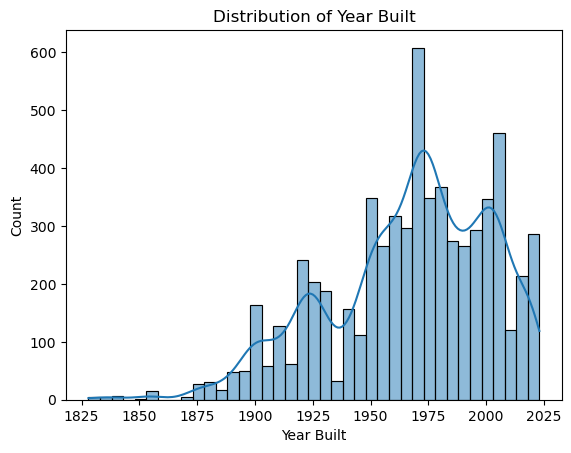

In [566]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.histplot(df['Year Built'], kde=True)
plt.title('Distribution of Year Built')
plt.show()



##### the Year Built' mean (1966.56) and median (1972) are quite close and the standard deviation is relatively small in relation to the mean. it indicates a fairly symmetrical distribution. Even though there is a slight skew in the histogram, the proximity of the mean and median suggests it's not heavily skewed. Thats why, we could use the median value to fill in NaNs because it's less sensitive to outliers and extreme values.

In [543]:
df.describe()

,price_reduced_amount,Year Built,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Tags Count
count,6365.000000,6035.000000,6.365000e+03,6365.000000,6.365000e+03,6365.000000,6365.000000,6365.000000,6365.000000
mean,6217.131972,1966.557912,4.201814e+05,1.896310,1.336133e+05,2.243350,3.219824,1.890057,10.662687
std,23423.958349,35.940165,7.129192e+05,0.837048,3.897693e+06,1.076485,1.302273,0.732666,5.683524
min,0.000000,1828.000000,2.500000e+03,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1946.000000,2.000000e+05,1.000000,5.101000e+03,2.000000,3.000000,1.506024,7.000000
50%,0.000000,1972.000000,3.150000e+05,2.000000,7.405000e+03,2.000000,3.000000,1.951566,11.000000
75%,5000.000000,1996.000000,4.750000e+05,2.000000,1.219700e+04,3.000000,4.000000,2.000000,14.000000
max,488001.000000,2023.000000,2.706500e+07,7.000000,1.390435e+08,9.000000,12.000000,11.000000,31.000000


In [545]:

# Calculating the median of 'Year Built'
median_year_built = df['Year Built'].median()

# Replacing NaN values with the median directly
df['Year Built'] = df['Year Built'].fillna(median_year_built)



/var/folders/t6/3h0vl0v113d71wg6sc1hsgvr0000gn/T/ipykernel_46978/188770758.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year Built'] = df['Year Built'].fillna(median_year_built)


### No nans anymore. yayy

In [546]:
null_counts = df.isnull().sum()

# Display the count of null values for each column
print(null_counts)

last_update_date        0
status                  0
list_date               0
price_reduced_amount    0
City                    0
State                   0
Year Built              0
Sold Date               0
Sold Price              0
Baths Full              0
Lot SqFt                0
Baths                   0
Beds                    0
Garage                  0
Type                    0
Tags Count              0
dtype: int64


### seeing if we have outliers 

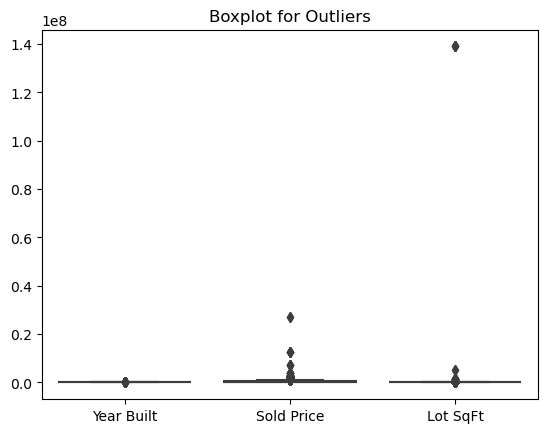

In [547]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.boxplot(data=df[['Year Built', 'Sold Price', 'Lot SqFt']])
plt.title('Boxplot for Outliers')
plt.show()



### -The boxplot shows that there are outliers in both the Sold Price and Lot SqFt variables. Outliers are data points that differ significantly from other observations and can occur due to variability in the measurement or indicate experimental errors. 

### - first i'm inspect the outliers for Lot SqFt 

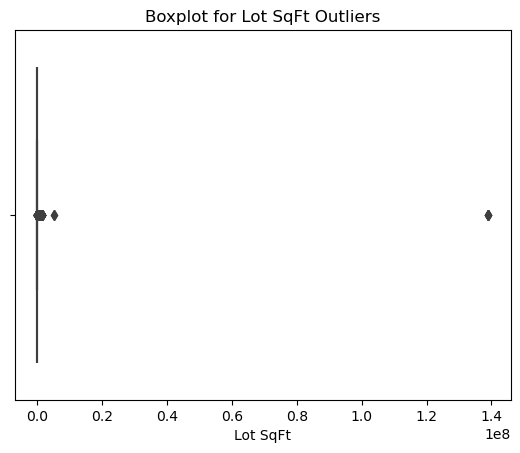

In [550]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Lot SqFt' is the column you want to inspect for outliers.
sns.boxplot(x=df['Lot SqFt'])
plt.title('Boxplot for Lot SqFt Outliers')
plt.show()


In [553]:
df

,last_update_date,status,list_date,price_reduced_amount,City,State,Year Built,Sold Date,Sold Price,Baths Full,Lot SqFt,Baths,Beds,Garage,Type,Tags Count
0,2024-01-17,sold,2023-11-27,0.0,Harrisburg,Pennsylvania,2001.0,2024-01-16,345000.0,2.00000,22651.0,2.000000,3.0,2.000000,single_family,17
1,2024-01-16,sold,2023-11-23,0.0,Harrisburg,Pennsylvania,1900.0,2024-01-16,196000.0,2.80429,2614.0,2.960836,3.0,3.000000,multi_family,8
2,2024-01-13,sold,2023-12-16,0.0,Harrisburg,Pennsylvania,1971.0,2024-01-12,205000.0,2.00000,13504.0,2.000000,3.0,1.951566,single_family,12
3,2024-01-16,sold,2023-10-24,0.0,Harrisburg,Pennsylvania,2013.0,2024-01-12,295000.0,2.00000,2688.0,3.000000,3.0,1.000000,townhomes,11
4,2024-01-13,sold,2023-11-15,0.0,Harrisburg,Pennsylvania,1900.0,2024-01-12,106000.0,2.80429,871.0,2.960836,3.0,2.567742,multi_family,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8153,2023-08-24,sold,2023-06-28,0.0,Indianapolis,Indiana,1952.0,2023-08-24,330000.0,2.00000,9583.0,2.000000,4.0,1.000000,single_family,16
8155,2023-08-22,sold,2023-07-25,0.0,Indianapolis,Indiana,1960.0,2023-08-22,140000.0,2.00000,14810.0,2.000000,4.0,2.000000,single_family,5
8156,2023-08-18,sold,2023-08-10,0.0,Indianapolis,Indiana,1985.0,2023-08-18,210000.0,2.00000,871.0,4.000000,3.0,1.000000,townhomes,16
8157,2023-08-17,sold,2023-08-14,0.0,Indianapolis,Indiana,1989.0,2023-08-17,163000.0,2.00000,3049.0,2.000000,2.0,2.000000,condos,13


### I want to see how many columns would we have if we OHE city and state?

In [554]:
city_values = df['City'].value_counts()
print(city_values)

City
Dover          210
Raleigh        210
Boston         210
Lansing        210
Frankfort      210
              ... 
Alexander        2
Old Hickory      2
Tolleson         1
Galloway         1
Hermitage        1
Name: count, Length: 80, dtype: int64


In [555]:
State_values = df['State'].value_counts()
print(State_values)

State
Massachusetts     210
New York          210
Kentucky          210
Delaware          210
North Carolina    210
Michigan          210
California        210
Wisconsin         210
Pennsylvania      205
Connecticut       205
Alabama           205
New Jersey        205
Minnesota         205
Colorado          205
Maryland          205
Georgia           205
Rhode Island      204
Arizona           203
Nebraska          203
Washington        202
Virginia          200
Oregon            200
Florida           200
Oklahoma          200
Iowa              196
Arkansas          194
Indiana           190
Nevada            188
South Carolina    152
West Virginia     149
Illinois          145
Ohio              127
Tennessee          80
Hawaii              6
New Hampshire       6
Name: count, dtype: int64


In [556]:
Type_values = df['Type'].value_counts()
print(Type_values)

Type
single_family     4514
condos             656
multi_family       486
townhomes          486
mobile             146
condo               52
apartment           20
duplex_triplex       5
Name: count, dtype: int64


In [551]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Lot SqFt' is the column with outliers
Q1 = df['Lot SqFt'].quantile(0.25)
Q3 = df['Lot SqFt'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['Lot SqFt'] > upper_bound]

# To see if the outliers consist of one or multiple values
unique_outliers = outliers['Lot SqFt'].unique()
number_of_unique_outliers = unique_outliers.size




### there are too many and i dont want to change it 

In [552]:
number_of_unique_outliers

107

### Droping my status since is all sold 

In [558]:
status_values = df['status'].value_counts()
print(status_values)

status
sold    6365
Name: count, dtype: int64


In [559]:
df = df.drop(columns=['status'])

###  Visualize the distribution of the sold prices to understand the range and skewness.

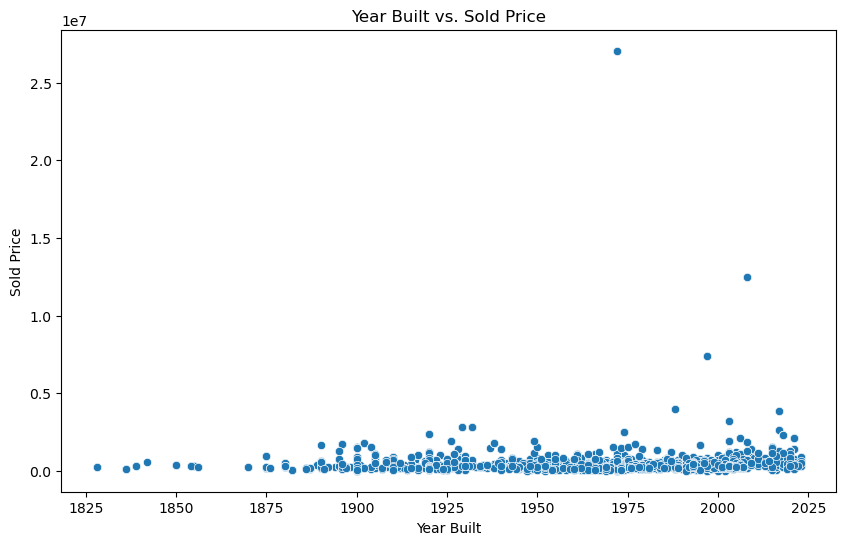

In [564]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year Built', y='Sold Price', data=df)
plt.title('Year Built vs. Sold Price')
plt.xlabel('Year Built')
plt.ylabel('Sold Price')
plt.show()



### Count of Sales by Type: To see which type of property is sold more.

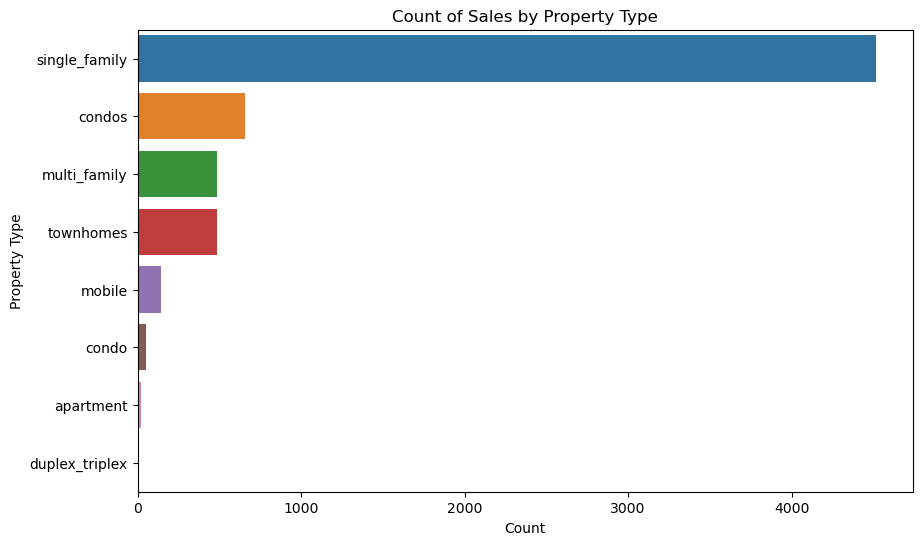

In [565]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Type', data=df, order = df['Type'].value_counts().index)
plt.title('Count of Sales by Property Type')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()


/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


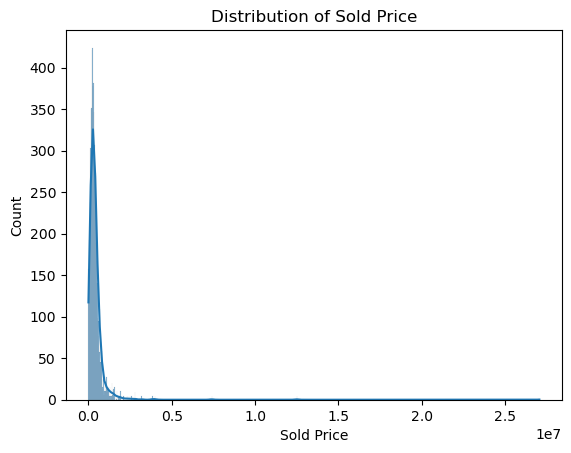

In [567]:
sns.histplot(df['Sold Price'], kde=True)
plt.title('Distribution of Sold Price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop(columns='class')
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

**STRETCH**

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [532]:
# import, join and preprocess new data here

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [533]:
# perform EDA here

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized